In [61]:
import copy
from rdkit.Chem import rdDepictor
from rdkit.Chem import rdFMCS
from rdkit import DataStructs
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.rdmolops import ReplaceSidechains
import openbabel
import os
import pandas as pd
import numpy as np
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG,display_svg
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 300,300
import matplotlib.pyplot as plt
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import ConfusionMatrixDisplay


In [6]:
nmrData  = pd.read_csv('NMRDatum.csv',header= None)
nmrData = nmrData.replace(np.nan,0)

In [37]:
#Store data in array. Each index contains atom index, multiplicity and shift for a given substituted molecule.
numOfMolecules = int(np.shape(nmrData)[1])
SubstitutedMoleculesNMR = []
molecule = []
count = 0
for i in range(numOfMolecules+1):
    if len(molecule) == 2:     
        SubstitutedMoleculesNMR.append(molecule)
        molecule = []
        if i< numOfMolecules:
            data = nmrData[i]
            #data = [x for x in data if pd.isnull(x) == False]
            data = [float(s) for s in data]
            molecule.append(data)
    else:
        if i< numOfMolecules:
            data = nmrData[i]
            #data = [x for x in data if pd.isnull(x) == False]
            data = [float(s) for s in data]
            molecule.append(data)
          


In [38]:
#Reduce the dimensionality of the input matrix
SubstitutedMoleculesNMR = np.array(SubstitutedMoleculesNMR)
nsamples, nx, ny = SubstitutedMoleculesNMR.shape
train_dataset = SubstitutedMoleculesNMR.reshape((nsamples,nx*ny))

In [20]:
PhenylPresence = np.ones(17) #Create output vector for the first 17 molecules
PhenylAbsence = np.zeros(12) #Create output vector for the last 12 molecules

                                        
output = np.concatenate([PhenylPresence,PhenylAbsence])

In [21]:
print(output.shape)
SubstitutedMoleculesNMR.shape

(29,)


(29, 2, 45)

In [66]:
#KNN

X_train, X_test, y_train, y_test = train_test_split(
            train_dataset, output, test_size = 0.2, random_state=42)
 
neighbors = np.arange(1, 9) #For this program, we only need two neighbors, but we wonder if the machine was going to find
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values to determine reasonable value of K(K=3 works best) 
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)


 

Text(0, 0.5, 'Testing Accuracy')

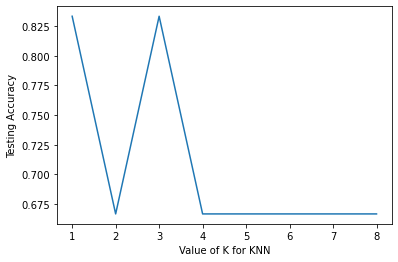

In [67]:
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(neighbors, test_accuracy)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')


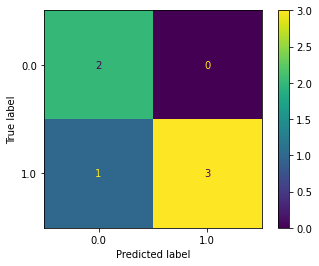

In [68]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
ConfusionMatrixDisplay.from_predictions( y_test, y_pred)

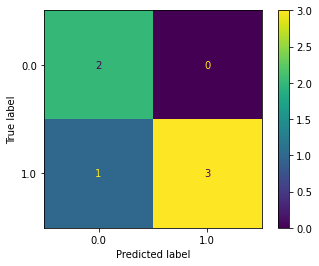

In [69]:
#Logistic Regression
logreg = LogisticRegression(solver='lbfgs', max_iter=400)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)